<a href="https://colab.research.google.com/github/StellarSynapse/Condensed-Matter-Physics/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kwant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for kwant: filename=kwant-1.5.0-cp311-cp311-linux_x86_64.whl size=4694535 sha256=23b28e5bed105bf8277a441214b7b2d49887cffca5907cbe2e5f09ad3604d27f
  Stored in directory: /root/.cache/pip/wheels/a2/bf/7b/1259da03398aed5010e178d317b9c9f10069f4489e8621e7de
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp311-cp311-linux_x86_64.whl size=255603 sha256=6b80ff7b2303a35cd5e345d47a8ae978c26607bbaf89990f8aa304209ebc55de
  Stored in directory: /root/.cache/pip/wheels/43/be/e7/bcb55bf65f75071aa5452b600a344ee7c32e4eebd66f57dc1c
Successfully built kwant tinyarray


In [ ]:
import kwant

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def make_lead(a=1, t=1.0, W=10):
  lat = kwant.lattice.square(a)
  sym_lead = kwant.TranslationalSymmetry((-a, 0))
  lead = kwant.Builder(sym_lead)
  for j in range(W):
    lead[lat(0,j)] = 4*t

    if j>0:
      lead[lat(0,j), lat(0,j-1)]=-t
      lead[lat(1,j), lat(0,j)]=-t

  return lead

In [ ]:
def main():
  lead = make_lead().finalized()
  kwant.plotter.bands(lead, show = False)

  plt.xlabel("momentum [(lattice constant)^-1]")
  plt.ylabel("energy [t]")
  plt.show()

/usr/local/lib/python3.11/dist-packages/kwant/lattice.py:746: KwantDeprecationWarning:

Not specfying norbs is deprecated. Always specify norbs when creating site families.



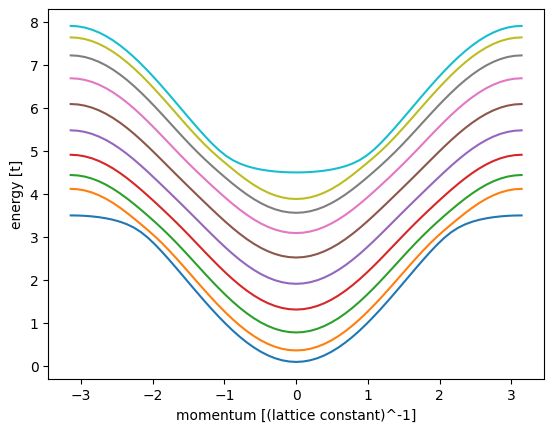

In [ ]:
if __name__ == '__main__':
  main()

In [ ]:
import kwant
import numpy as np
import tinyarray
import matplotlib.pyplot as plt


In [ ]:
tau_x = tinyarray.array([[0, 1], [1, 0]])
tau_z = tinyarray.array([[1, 0], [0, -1]])


In [ ]:
def make_lead(a=1, t=1.0, mu=0.7, Delta=0.1, W=10):
    lat = kwant.lattice.square(a)
    sym_lead = kwant.TranslationalSymmetry((-a, 0))
    lead = kwant.Builder(sym_lead)

    for j in range(W):
        lead[lat(0, j)] = (4 * t - mu) * tau_z + Delta * tau_x
        if j > 0:
            lead[lat(0, j), lat(0, j - 1)] = -t * tau_z
        lead[lat(1, j), lat(0, j)] = -t * tau_z

    return lead


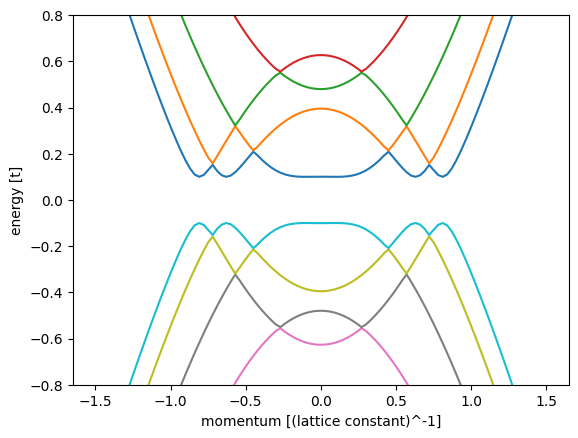

In [ ]:
def main():
    lead = make_lead()  # Не викликаємо .finalized() тут

    kwant.plotter.bands(lead.finalized(), momenta=np.linspace(-1.5, 1.5, 101), show=False)

    plt.xlabel("momentum [(lattice constant)^-1]")
    plt.ylabel("energy [t]")
    plt.ylim([-0.8, 0.8])
    plt.show()

if __name__ == "__main__":
    main()
